<a href="https://colab.research.google.com/github/feltri08/Proyecto_IA/blob/main/Proyecto_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASIFICACION DE IMAGENES DE ALZHEIMER

**Presentado por:**

Sergio Andrés Carrillo Muñoz 

Juan Felipe Ortiz Trilloz



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Librerias 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

 **CLASES DEL DATASET**

Las clases del dataset se definen de la siguiente forma:


1.  NonDemented
2.  ModerateDemented
3.  MildDemented
4.  VeryMildDemented

El dataset a trabajar ya tiene las particiones de Train y Test.

Acontinuacion cargaremos los datos de Train para cada una de las clases: 

   

In [6]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la primera clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/NonDemented'
classes_names = os.listdir(path_classes)

#creamos dos listas para empezar a guardar las imagenes 
X_train=[] #lista con caracteristicas (imagenes)
y_train=[] #lista con etiquetas
dim = (150,150)  #Dimensiones para las imagenes que trabajaremos

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(0)  #0 NonDemented


In [7]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la segunda clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/ModerateDemented'
classes_names = os.listdir(path_classes)

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(1)  #1 ModerateDemented


In [8]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la tercera clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/MildDemented'
classes_names = os.listdir(path_classes)

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(2)  #2 MildDemented

In [9]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la cuarta clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/VeryMildDemented'
classes_names = os.listdir(path_classes)

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(3)  #3 VeryMildDemented

In [10]:
perm = np.random.permutation(range(len(X_train)))
X_train = np.r_[X_train]
y_train=np.r_[y_train]
X_train=X_train[perm]
y_train=y_train[perm]
print(X_train.shape)

(5121, 22500)


Visualizamos algunas de nuestras imágenes del dataset:

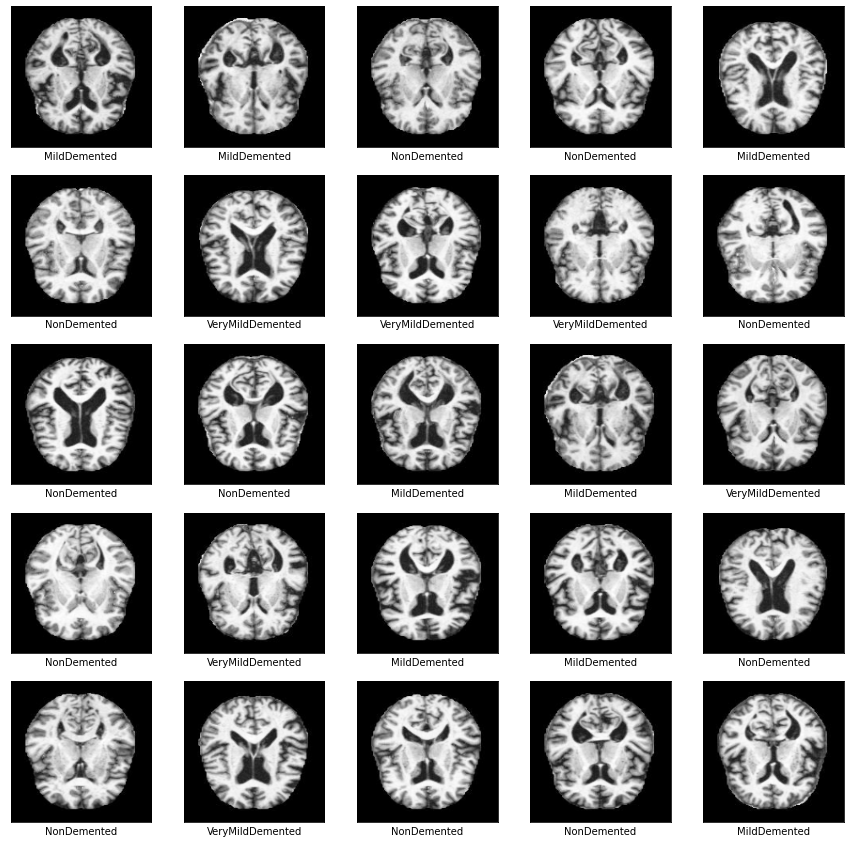

In [11]:
class_names = ['NonDemented','ModerateDemented','MildDemented','VeryMildDemented']
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape(150,150), cmap = plt.cm.Greys_r)
    plt.xlabel(class_names[y_train[i]])
  

A continuación se visualizara el numero de imágenes por cada clase. 

In [12]:
print( "  clase   # de imágenes")
for i in np.unique(y_train):
    print( "   ",int(i), "       ", np.sum(y_train==i))

  clase   # de imágenes
    0         2560
    1         52
    2         717
    3         1792


<br><br><br>
<h3> En este momento realizaremos la carga de la parte de testeo del dataset <h3>

In [13]:
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/NonDemented'
test = os.listdir(loadtest)

#creamos dos listas para empezar a guardar las imagenes 
X_test = [] #lista con imágenes de test
y_test = []
dim = (150,150)  #Dimensiones para las imagenes que trabajaremos

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(0)  #0 NonDemented

In [14]:
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/ModerateDemented'
test = os.listdir(loadtest)
dim = (150,150)  #Dimensiones para las imagenes que trabajaremos

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(1)  #1 ModerateDemented

In [15]:
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/MildDemented'
test = os.listdir(loadtest)
dim = (150,150)  #Dimensiones para las imagenes que trabajaremos

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(2)  #2 MildDemented

In [16]:
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/VeryMildDemented'
test = os.listdir(loadtest)
dim = (150,150)  #Dimensiones para las imagenes que trabajaremos

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(3)  #3 NonDemented

Shape de los dos test y su clasificación

In [17]:
print( "  clase   # de imágenes")
for i in np.unique(y_test):
    print( "   ",int(i), "       ", np.sum(y_test==i))

  clase   # de imágenes
    0         640
    1         12
    2         179
    3         448


<br><br><br>



<h2> Utilizaremos los métodos que vimos para decicidir cual será el mejor

In [18]:

test_size = 0.2
#by defautl is 0.25 in test.

g = GaussianNB()
g.fit(X_train, y_train)
print( "acierto en train", g.score(X_train, y_train))
print( "acierto en test ", g.score(X_test, y_test))

acierto en train 0.5672720171841438
acierto en test  0.5340109460516028


<br><br> <h2> **SVC**

In [19]:


svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
print( "acierto en train", svc.score(X_train, y_train))
print( "acierto en test ", svc.score(X_test, y_test))

predicciones_train = svc.predict(X_train)
predicciones_test  = svc.predict(X_test)

cm_train = confusion_matrix(y_train, predicciones_train)
cm_test = confusion_matrix(y_test, predicciones_test)
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))

acierto en train 0.8566686194102714
acierto en test  0.584831899921814
matrix de confusión en train
 [[2465    0    0   95]
 [   6   22    0   24]
 [ 105    0  435  177]
 [ 327    0    0 1465]]
matrix de confusión en test
 [[569   0   0  71]
 [  6   0   0   6]
 [ 85   0   1  93]
 [270   0   0 178]]
verifica número de imágenes en total por fila
[640  12 179 448]


<br><br> <h2> **CrossValidation Gaussian**

In [24]:

sG = cross_val_score(GaussianNB(), X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(sG), np.std(sG)))

accuracy 0.530 (+/- 0.04294)


<br><br> <h2> **Decision Tree Classifier**

In [26]:
from sklearn.tree import DecisionTreeClassifier
estDT = DecisionTreeClassifier(max_depth=60)
estDT.fit(X_train, y_train)
sDT = cross_val_score(estDT, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(sDT), np.std(sDT)))

accuracy 0.737 (+/- 0.03271)


<br><br> <h2> **RF**

In [25]:

srf = cross_val_score(SVC(kernel='poly'), X_test, y_test, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(srf), np.std(srf)))

accuracy 0.887 (+/- 0.01898)


<br><br> <h2> **Pipeline**

In [23]:

p = Pipeline((("pca", PCA(n_components=50)), ("classifier", SVC(kernel='rbf')) ))
sp = cross_val_score(p, X_test, y_test, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(sp), np.std(sp)))

accuracy 0.864 (+/- 0.02697)
